# Pixel Level Manipulation Notebook

In [1]:
#export
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pdb

## Time Something

In [3]:
#export
import time
def timeSomething(func, n_iter, *args, **kwargs):
    start_time = time.time()
    for i in range(n_iter): func(*args, **kwargs)
    end_time = time.time() - start_time
    end_time /= n_iter
    print('Average time is :', end_time)

This function just gives an average amount of time that a function takes to run. The first argument should be a function, the second is the number of iterations to test and the `*args` and `**kwargs` are just generic inputs to pass to the function.

In [4]:
timeSomething(np.array, 10, [1] * 10000, dtype = np.float64)

Average time is : 0.000698089599609375


## Make a Histogram

In [5]:
frog_img = cv2.imread('Images/dat_boi.jpg')

In [6]:
#export

def getChannels(img : np.array):
    
    im_copy = img.copy()
    
    if len(img.shape) == 2:
        height, width = img.shape
        channels = 1
        im_copy.reshape(height, width, 1)
        return im_copy, height, width, channels, width*height
    
    if len(img.shape) == 3:
        height, width, channels = img.shape
        return im_copy, height, width, channels, width*height
    
    print('That does not look like an image to me.')

def iterateImage(i : int, j : int, k : int, channels : int, width : int):
    k += 1
    if k == channels: k = 0; j += 1
    if j == width: j = 0; i+=1
    return i, j, k

def iterateImageFortran(i : int, j : int, k : int, height : int, width : int):
    i += 1
    if i == height: i = 0; j += 1
    if j == width: j = 0; i = 0; k+=1
    return i, j, k

def createCountTable(table_shape : tuple):
    output = np.ndarray(table_shape, dtype = np.uint32)
    output.fill(0)
    return output

In [7]:
#export

def computeHistogram(img : np.array, n_bins : int, lower_thresh : int = 0, upper_thresh : int = 255):
    
    if upper_thresh > 255: upper_thresh = 256
    if lower_thresh < 0: lower_thresh = -1
    if lower_thresh > upper_thresh:
        x = upper_thresh; upper_thresh = lower_thresh; lower_thresh = x
        
    img, height, width, channels, im_size = getChannels(img)
    
    output_table = createCountTable((channels, n_bins + 1))
    bucket_size = (upper_thresh - lower_thresh - 2) // n_bins
    bucket_size = np.max((bucket_size, 1))
    
    i = 0; j = 0; k = 0
    for px in np.nditer(img):
        if (px > upper_thresh): i, j, k = iterateImage(i, j, k, channels, width); continue
        if (px < lower_thresh): i, j, k = iterateImage(i, j, k, channels, width); continue
        hist_bin = px - lower_thresh
        hist_bin //= bucket_size
        output_table[k, hist_bin] += 1
        i, j, k = iterateImage(i, j, k, channels, width)
        
    return output_table

In [8]:
frog_histograms = computeHistogram(frog_img, 10, 50, 240)

In [9]:
#export

import matplotlib.pyplot as plt

def plotHistogram(output_table : np.ndarray, col_channels : tuple = ('b', 'g', 'r')):
    plt.figure(figsize=(15,8))
    for k in range(len(output_table)):
        hist = output_table[k]
        plt.plot(hist, c = col_channels[k])

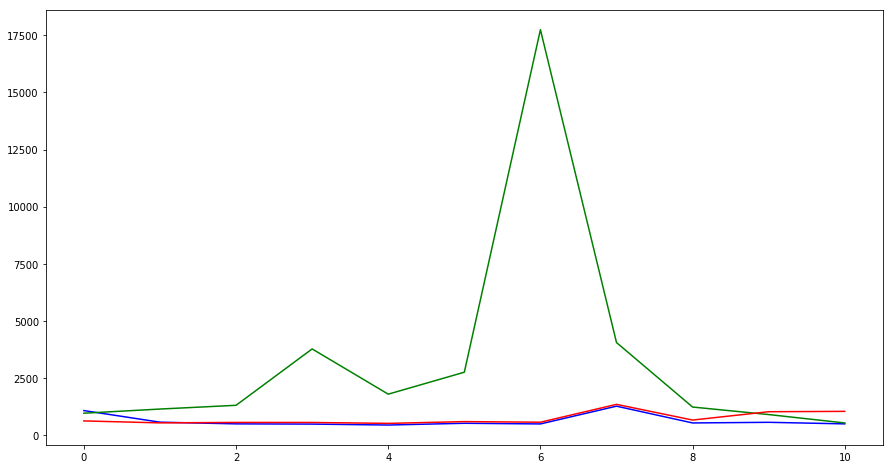

In [10]:
plotHistogram(frog_histograms)

This is image has a relatively high amount of green. This is a shocking discovery.

In [11]:
#export
def showImage(img, **kwargs):
    plt.imshow(img, **kwargs);
    plt.gca().set_xticks([]);
    plt.gca().set_yticks([]);
    return plt.gca()

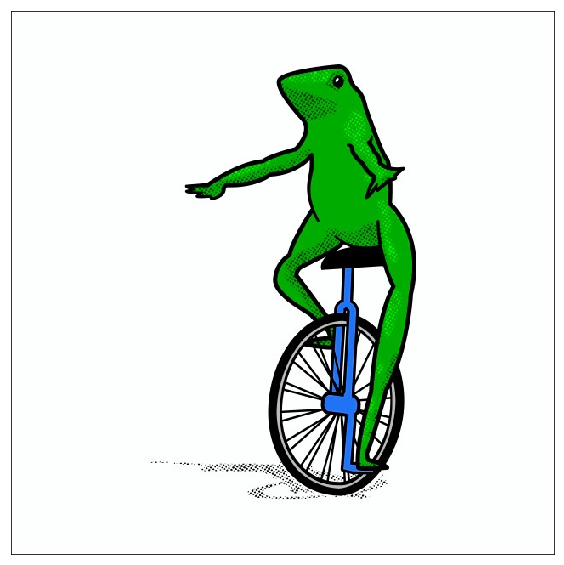

In [12]:
plt.figure(figsize=(10,10))
showImage(frog_img);

In [13]:
!python notebook2script.py PixelManipulation.ipynb

Converted PixelManipulation.ipynb to Export\nb_PixelManipulation.py


## Export Test

In [14]:
# export
export_test = True

In [15]:
export_test = False
from Export.nb_PixelManipulation import *
if export_test: print('Export suceeded!')

Export suceeded!
